In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from ROOT import TVector3
import perform_calibrations as pc #import perform calibration package to get data
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import ROOT
import array
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('text', usetex=True)

Welcome to JupyROOT 6.18/04
iiwi 1502.0830666775068
humu 877.558192135582
nene 898.7259479097642
tako 806.4732738326991
palila 1033.3696255012533
elepaio 797.0408662124006


iiwi 1502.0830666775068
humu 877.558192135582
nene 898.7259479097642
tako 806.4732738326991
palila 1033.3696255012533
elepaio 797.0408662124006


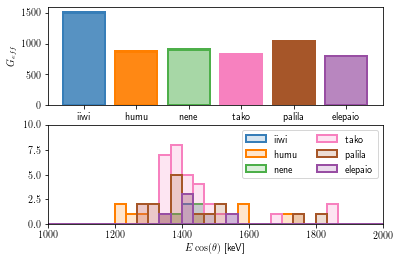

In [2]:
t = pc.tpc_calibration()

In [3]:
uncorrected_recoils = t.calibrate_recoils(corrected_energy = True, corrected_length = 0)
corrected_recoils = t.calibrate_recoils(corrected_energy = True, corrected_length = 0)

In [31]:
recoils = corrected_recoils
for tpc in recoils.keys():
    recoils[tpc]=recoils[tpc].loc[recoils[tpc]['full_corrected_energy']>0]
cut_min = np.array([6.39393939e-06, 5.64545455e-03, 1.92424242e+00])
cut_max = np.array([7.72727273e-06, 3.00454545e-02, -1.34090909e+01])
recoils['tako'] = recoils['tako'].loc[recoils['tako']['full_corrected_energy'] > (cut_min[0]*recoils['tako']['length']**2 + cut_min[1]*recoils['tako']['length']+cut_min[2])]

(0.0, 2000.0)

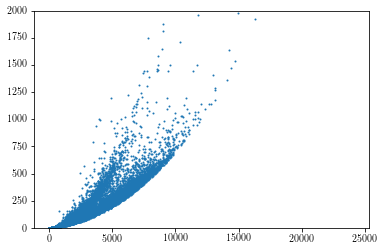

In [32]:
plt.plot(corrected_recoils['tako']['length'], corrected_recoils['tako']['full_corrected_energy'], 'o', markersize = 1)
plt.ylim(0,2000)

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
test = np.concatenate((recoils['tako']['length'].to_numpy()[:,np.newaxis], recoils['tako']['full_corrected_energy'].to_numpy()[:,np.newaxis]),axis = 1)
gmm.fit(test)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

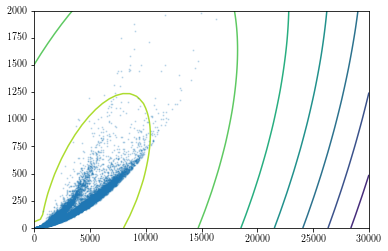

In [41]:
X, Y = np.meshgrid(np.linspace(-1, 30000), np.linspace(-1,2000))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
 
plt.contour(X, Y, Z)
plt.plot(test[:, 0], test[:, 1], 'o', alpha = 0.2, markersize = 1)
plt.ylim(0,2000)
 
plt.show()